In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

In [2]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

In [17]:
brands = opportunities.groupby("Opportunity_ID").agg({"Brand":"unique"})
brands["Total"] = brands["Brand"].apply(lambda x: len(x))
brands = brands[brands["Total"] != 1]
brands
#Veo que todas las oportunidades tengan un solo Brand

,Brand,Total
Opportunity_ID,,


# Veo cantidad de veces que aparece cada brand

In [67]:
opportunities = opportunities[(opportunities["Brand"]!="None")] #Borro los None xq hay casi 16000
opportunities.drop_duplicates(subset="Opportunity_ID",inplace=True)
brands = opportunities[["Brand","Opportunity_ID"]].groupby("Brand").agg({"Opportunity_ID":"count"})
brands.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
brands.reset_index(inplace=True)
brands.sort_values(by="Cantidad",inplace=True)
brands = brands[brands["Cantidad"] > 10]
brands

,Brand,Cantidad
5,Brand_13,12
11,Brand_21,14
12,Brand_22,17
2,Brand_10,21
14,Brand_24,26
3,Brand_11,31
20,Brand_5,35
23,Brand_9,79
24,Other,378


[Text(0, 0, 'Brand_20'),
 Text(0, 0, 'Brand_25'),
 Text(0, 0, 'Brand_23'),
 Text(0, 0, 'Brand_7'),
 Text(0, 0, 'Brand_13'),
 Text(0, 0, 'Brand_21'),
 Text(0, 0, 'Brand_22'),
 Text(0, 0, 'Brand_10'),
 Text(0, 0, 'Brand_24'),
 Text(0, 0, 'Brand_11'),
 Text(0, 0, 'Brand_5'),
 Text(0, 0, 'Brand_9'),
 Text(0, 0, 'Other')]

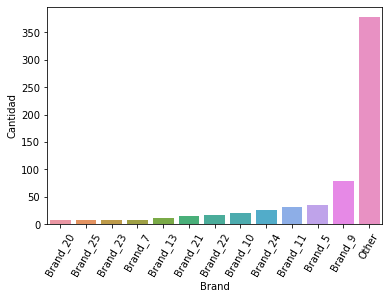

In [39]:
plot = sns.barplot(x="Brand",y="Cantidad",data=brands)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

# Brand vs Stage

In [78]:
brandsVsStage = opportunities[["Brand","Stage","Opportunity_ID"]].groupby(["Brand","Stage"]).agg({"Opportunity_ID":"count"})
brandsVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
totalBrands = brandsVsStage.groupby("Brand").agg({"Cantidad":"sum"})
brandsVsStage.reset_index(inplace=True)
brandsVsStage.set_index("Brand",inplace=True)
brandsVsStage["Total Brands"] = totalBrands["Cantidad"]
brandsVsStage = brandsVsStage[brandsVsStage["Total Brands"]>10]
brandsVsStage.reset_index(inplace=True)
brandsVsStage["Closed Lost Percentage"] = brandsVsStage["Cantidad"]/brandsVsStage["Total Brands"]
brandsVsStage

,Brand,Stage,Cantidad,Total Brands,Closed Lost Percentage
0,Brand_10,Closed Lost,21,21,1.0
1,Brand_11,Closed Lost,31,31,1.0
2,Brand_13,Closed Lost,12,12,1.0
3,Brand_21,Closed Lost,14,14,1.0
4,Brand_22,Closed Lost,17,17,1.0
5,Brand_24,Closed Lost,26,26,1.0
6,Brand_5,Closed Lost,35,35,1.0
7,Brand_9,Closed Lost,79,79,1.0
8,Other,Closed Lost,378,378,1.0


[Text(0, 0, 'Brand_10'),
 Text(0, 0, 'Brand_11'),
 Text(0, 0, 'Brand_13'),
 Text(0, 0, 'Brand_21'),
 Text(0, 0, 'Brand_22'),
 Text(0, 0, 'Brand_24'),
 Text(0, 0, 'Brand_5'),
 Text(0, 0, 'Brand_9'),
 Text(0, 0, 'Other')]

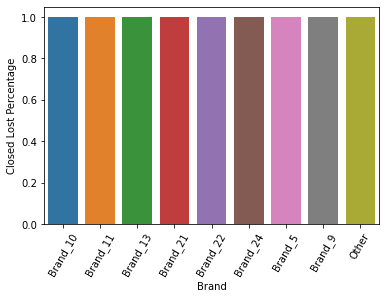

In [83]:
plot = sns.barplot(x="Brand",y="Closed Lost Percentage",data=brandsVsStage)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

# Brand vs Product Type

In [87]:
brandVsProductType = opportunities[["Brand","Product_Type","Opportunity_ID"]].groupby(["Brand","Product_Type"]).agg({"Opportunity_ID":"count"})
brandVsProductType.reset_index(inplace=True)
totalBrands = brandVsProductType.groupby("Brand").agg({"Opportunity_ID":"sum"})
brandVsProductType.set_index("Brand",inplace=True)
brandVsProductType["Total Brands"] = totalBrands["Opportunity_ID"]
brandVsProductType = brandVsProductType[brandVsProductType["Total Brands"]>10]
brandVsProductType.reset_index(inplace=True)
brandVsProductType.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
brandVsProductType

,Brand,Product_Type,Cantidad,Total Brands
0,Brand_10,Other,2,21
1,Brand_10,Product_Type_0,5,21
2,Brand_10,Product_Type_1,3,21
3,Brand_10,Product_Type_3,10,21
4,Brand_10,Product_Type_4,1,21
5,Brand_11,Other,3,31
6,Brand_11,Product_Type_0,6,31
7,Brand_11,Product_Type_1,11,31
8,Brand_11,Product_Type_2,1,31
9,Brand_11,Product_Type_3,7,31


[Text(0, 0, 'Other'),
 Text(0, 0, 'Product_Type_0'),
 Text(0, 0, 'Product_Type_1'),
 Text(0, 0, 'Product_Type_3'),
 Text(0, 0, 'Product_Type_4'),
 Text(0, 0, 'Product_Type_2'),
 Text(0, 0, 'None')]

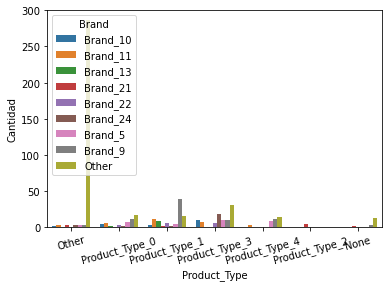

In [88]:
plot = sns.barplot(x="Product_Type",y="Cantidad",hue="Brand",data=brandVsProductType)
plot.set_xticklabels(plot.get_xticklabels(), rotation=15)
#MEJORAR ESTE GRAFICO